In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

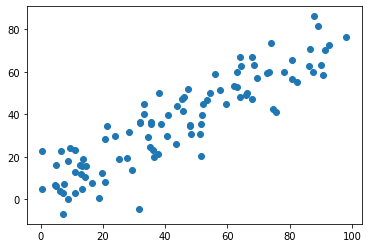

In [3]:
plt.scatter(X[:,0], X[:,1])

# demean


In [4]:
# 均值归零化
def demean(X):
    return X - np.mean(X, axis=0) # 求每一列的均值

In [5]:
X_demean = demean(X)

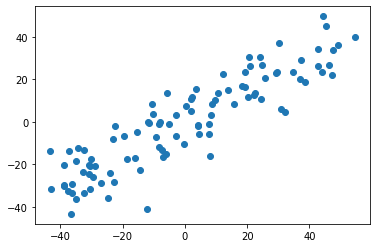

In [6]:
plt.scatter(X_demean[:,0], X_demean[:,1])

In [8]:
np.mean(X_demean[:,1])

-4.7251091928046665e-15

# 梯度上升法

In [13]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [14]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [15]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] += epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    
    return res

In [16]:
def direction(w):
    return w / np.linalg.norm(w)

In [26]:
def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w+eta*gradient
        w = direction(w) # 每次求一个单位方向
        if(abs(f(w,X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1
        
    return w

In [27]:
initial_w = np.random.random(X.shape[1]) # 不能从0向量开始
initial_w

array([0.05420326, 0.82827165])

In [28]:
eta = 0.001

In [29]:
# 不能使用StanderardScaler 标准化数据
w = gradient_ascent(df_debug, X_demean, initial_w, eta)

In [30]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.78351905, 0.62136776])

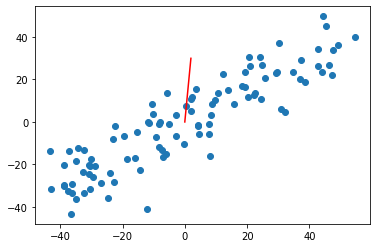

In [31]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')